###### Data Description:
    The Task is to predict the rings of the each abalone which will lead us to find the age of that Abalone.
    

In [132]:
#Importing required Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [133]:
#downloading the dataset :
abalone=pd.read_csv("AbaloneDataSet.csv")
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [134]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [135]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [136]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [137]:
abalone.shape

(4177, 9)

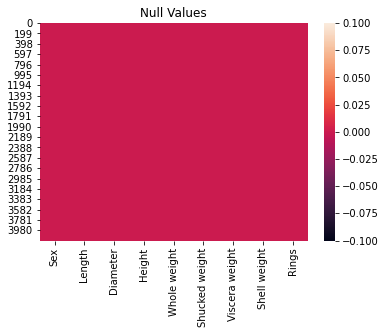

In [138]:
sns.heatmap(abalone.isnull())
plt.title("Null Values")
plt.show()

There is no null values in the dataset.

In [139]:
#LabelEncoding for Column Sex

LE=LabelEncoder()
abalone["Sex"]=LE.fit_transform(abalone["Sex"])
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Now lets check the correlation matrix

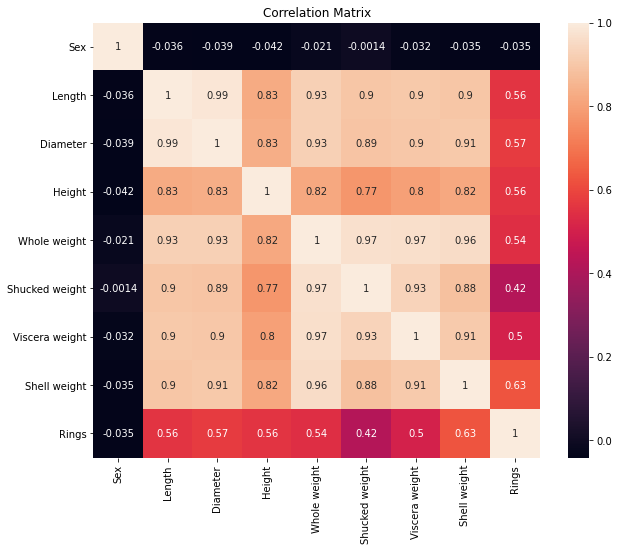

In [140]:
ab_cor=abalone.corr(method='pearson')
plt.figure(figsize=[10,8])
sns.heatmap(ab_cor, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [141]:
ab_cor['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

We can see the correlation between the independant variable and dependant variable Rings.
Only Sex has very low correlation with Rings which is -0.034

###### Checking Outliers :
Lets check for the Outliers in our dataset.

<AxesSubplot:>

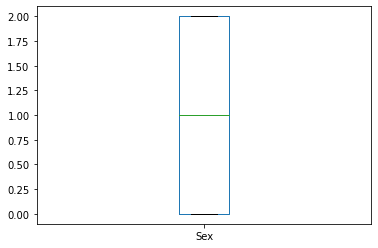

In [167]:
abalone["Sex"].plot.box()

<AxesSubplot:>

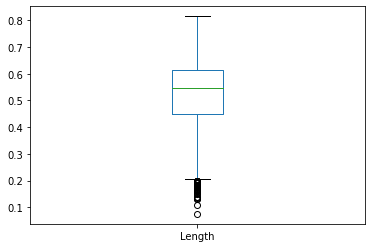

In [168]:
abalone["Length"].plot.box()

From the above observation, we see there are outliers in Length Column

<AxesSubplot:>

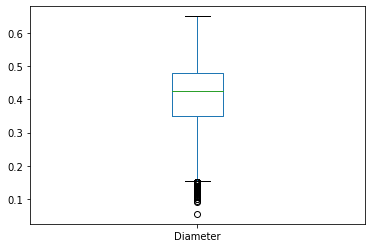

In [169]:
abalone["Diameter"].plot.box()

There are utliers in Diameter Column

<AxesSubplot:>

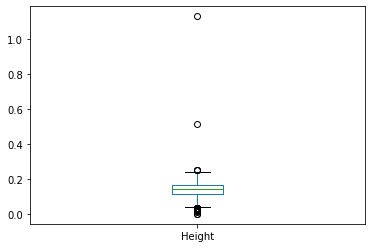

In [170]:
abalone["Height"].plot.box()

<AxesSubplot:>

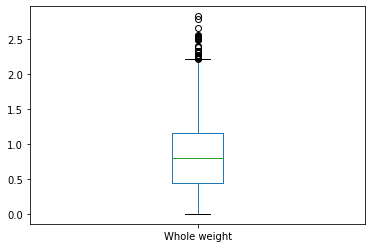

In [171]:
abalone["Whole weight"].plot.box()

<AxesSubplot:>

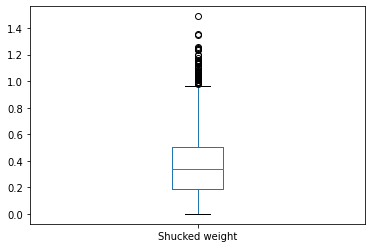

In [172]:
abalone["Shucked weight"].plot.box()

<AxesSubplot:>

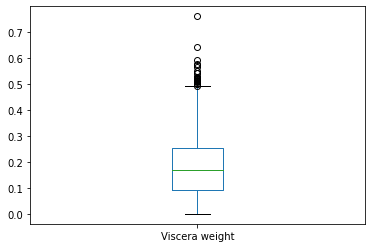

In [173]:
abalone["Viscera weight"].plot.box()

<AxesSubplot:>

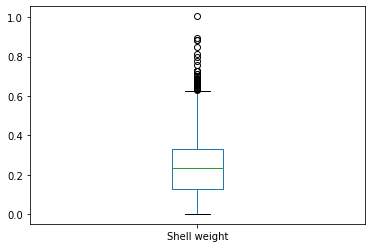

In [175]:
abalone["Shell weight"].plot.box()

From the above observations we can see that there are outliers in Columns > Length 	Diameter 	Height 	Whole weight 	Shucked weight 	Viscera weight 	Shell weight

In [176]:
#Lets try to remove Outliers

abalone.shape

(4177, 9)

In [154]:
from scipy.stats import zscore

In [177]:
z=np.abs(zscore(abalone))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [156]:
print(z)

[[1.15198011 0.57455813 0.43214879 ... 0.60768536 0.72621157 0.63821689]
 [1.15198011 1.44898585 1.439929   ... 1.17090984 1.20522124 1.21298732]
 [1.28068972 0.05003309 0.12213032 ... 0.4634999  0.35668983 0.20713907]
 ...
 [1.15198011 0.6329849  0.67640943 ... 0.74855917 0.97541324 0.49695471]
 [1.28068972 0.84118198 0.77718745 ... 0.77334105 0.73362741 0.41073914]
 [1.15198011 1.54905203 1.48263359 ... 2.64099341 1.78744868 1.84048058]]


In [178]:
abalone_zscr=abalone[(z<3).all(axis=1)]
abalone_zscr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [179]:
abalone_zscr.shape

(4027, 9)

In [180]:
#% of Data Loss :

DataLoss=((4177-4027)/4177)*100
DataLoss    

3.5910940866650707

3.6% data loss after removing the outliers

###### Skewness

Checking Skewness of the data

In [181]:
abalone_zscr.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

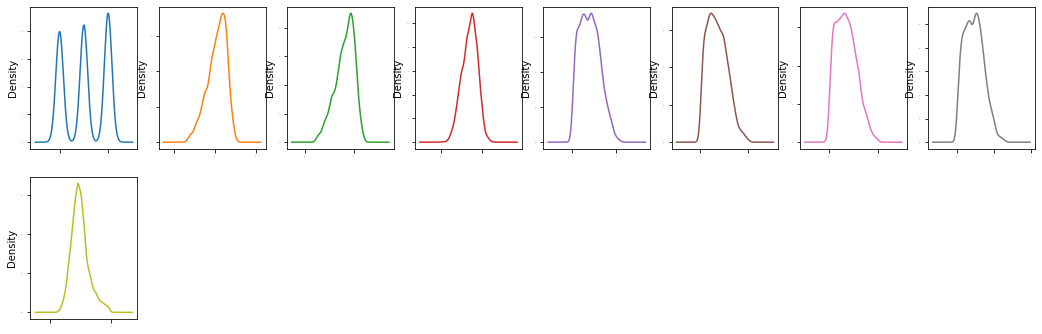

In [182]:
abalone_zscr.plot(kind='density', subplots=True,sharex=False,legend=False, fontsize=1,figsize=(18,12),layout=(4,8))
plt.show()

We donot see any major skewness in the data.

###### Separation of Feature set x and target set y

In [183]:
x=abalone_zscr.drop(["Rings"],axis=1)
y=abalone_zscr["Rings"]
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [184]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i) #Train/Test Splitting
    LR=LinearRegression()           #LinearRegression
    LR.fit(x_train,y_train)         #Fitting the Model
    pred=LR.predict(x_test)         #Predition
    acc=LR.score(x_train,y_train)   #Accuracy score
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Acc:",maxAcc,"on Rand State ",maxRS)

Best Acc: 0.5310646852178886 on Rand State  53


###### Creating Train Test split :

In [187]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=165)

In [188]:
LR=LinearRegression()
LR.fit(x_train,y_train)
#The Coefficients : 
print('Coefficients :',LR.coef_)
print('Intercepts :',LR.intercept_)

Coefficients : [  0.08546613  -0.16955215  10.70727332  22.74296737   7.45630006
 -17.99288112  -7.59745592   6.6762736 ]
Intercepts : 2.333011276430068


In [189]:
#Prediction :

pred=LR.predict(x_test)
pred

array([16.34995862,  8.70148881, 10.3392013 ,  9.4534349 ,  9.73554934,
       10.46691211,  8.73200754,  9.63213876, 10.19131515, 10.52000418,
        6.25072454, 12.17599469, 12.74802181,  9.41019641,  7.66490371,
       10.28809338,  9.80351879,  5.56253654, 10.70465114, 10.71737379,
        9.95108244, 12.67468489, 13.2077219 , 12.84168725,  7.50843618,
        6.57531796,  6.80436996, 10.19597805, 11.77630916,  7.19080702,
       10.31537695,  6.83671199, 10.0765048 ,  9.21699272,  9.36694503,
        9.9569715 , 12.34764534, 11.88084006,  9.57739325, 11.0076246 ,
       10.04924408,  8.21724468, 10.72694782,  8.22074961,  9.14079484,
        9.08526776,  8.31350894,  9.82625221,  8.98924486, 10.8218314 ,
       11.10595078,  9.4903245 , 10.73464296, 12.65972392,  5.76415615,
       11.29888825, 10.6171558 ,  7.38418489, 10.27371339,  9.86823661,
        9.86389102,  9.00215743,  8.60275587,  8.75023314,  9.77820685,
        7.49250579, 12.12613269,  9.12410874, 11.27026304,  8.07

In [192]:
#AccuracyScore :

r2_score=LR.score(x_train,y_train)
r2_score

0.5048657894915283

###### Cross-Validation of the model

In [195]:
from sklearn.model_selection import cross_val_score

LRscr=cross_val_score(LR,x,y,cv=10)
print(LRscr)
print(LRscr.mean(),LRscr.std())

[0.53506545 0.33371268 0.29844228 0.06436205 0.28395131 0.47386846
 0.39073354 0.40981299 0.46643267 0.47222947]
0.37286109048584437 0.12921868629221725


In [201]:
LRscr=cross_val_score(LR,x,y,cv=5)
print(LRscr)
print(LRscr.mean(),LRscr.std())

[0.39223862 0.21391524 0.49735705 0.49887296 0.47162632]
0.4148020401486134 0.10768181211472061


In [202]:
LRscr=cross_val_score(LR,x,y,cv=3)
print(LRscr)
print(LRscr.mean(),LRscr.std())

[0.51297023 0.49187695 0.48247274]
0.4957733082809949 0.01275174186339846


In [200]:
LRscr=cross_val_score(LR,x,y,cv=2)
print(LRscr)
print(LRscr.mean(),LRscr.std())

[0.50178293 0.51652101]
0.5091519690309692 0.007369043368200268


We see that at cv=2 we get more accuracy compared to other CVs.

Lets Fit the line

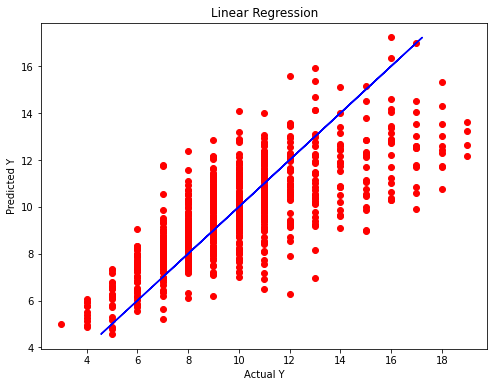

In [204]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(pred,pred,color='b')
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Linear Regression")
plt.show()

Best fit line is covering the most of our data points.

###### Regularization

In [205]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.504222625122051


array([  0.08243525,   1.11164796,   9.54699152,  18.65980909,
         6.91456692, -17.40913961,  -6.52304371,   7.66527192])

###### Ensemble Technique:

In [209]:
from sklearn.ensemble import RandomForestRegressor

maxAcc=0
maxRS=0
for i in range(1,200):
    rf=RandomForestRegressor()           
    LR.fit(x_train,y_train)         #Fitting the Model
    pred=LR.predict(x_test)         #Predition
    acc=LR.score(x_train,y_train)   #Accuracy score
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Acc:",maxAcc,"on Rand State ",maxRS)


Best Acc: 0.5048657894915283 on Rand State  1


In [ ]:
import joblib
file_name="Abalone.obj"
joblib.dump(LR,open(file_name,'wb'))

In [194]:
#Conclusion :
a=np.array(y_test)
b=np.array(pred)
cdf=pd.DataFrame({'Original':a,'Predicted':b},index=range(len(a)))
cdf

,Original,Predicted
0,16,16.349959
1,12,8.701489
2,8,10.339201
3,11,9.453435
4,8,9.735549
...,...,...
801,7,8.413233
802,9,12.056767
803,13,10.112163
804,15,14.508190
